In [1]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [2]:
air = ml.Non_Dispersion(1)
sodalime = ml.Non_Dispersion(1.65)
#sodalime = ml.open_material('sodalime_Nanya', 'Material')
OC = ml.open_material('OC_LENS', 'Material')
OC_HRI = ml.open_material('OC_HRI_LENS', 'Material')
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')

ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])

In [3]:
wl = np.linspace(400, 700, 301)
wl1 = np.linspace(400, 450, 51)
wl2 = np.linspace(450, 700, 251)

bridge_11 = lambda th:tm.Design(
    [air,OC,SiN,SiO2,ITO,OC,ITO,SiO2,SiN,sodalime],
    [None, th['acr']-th['oc']-th['b_ito'], th['t_sin'], th['t_sio2'], th['ito'], th['oc'], th['b_ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl,0)
diamond_11 = lambda th: tm.Design(
    [air,OC,SiN,SiO2,ITO,SiO2,SiN,sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl,0)
trace_11 = lambda th: tm.Design(
    [air,OC,SiN,SiO2,SiO2,SiN,sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl,0)

In [4]:
bridge_12 = lambda th:tm.Design(
    [LOCA,OC,SiN,SiO2,ITO,OC,ITO,SiO2,SiN,sodalime],
    [None, th['acr']-th['oc'], th['t_sin'], th['t_sio2'], th['ito'], th['oc'], th['b_ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
diamond_12 = lambda th: tm.Design(
    [LOCA,OC,SiN,SiO2,ITO,SiO2,SiN,sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
trace_12 = lambda th: tm.Design(
    [LOCA,OC,SiN,SiO2,SiO2,SiN,sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)

In [5]:
delta_d_b_11 = lambda th: np.mean(abs(diamond_11(th)-bridge_11(th)))
delta_d_t_11 = lambda th: np.mean(abs(diamond_11(th)-trace_11(th)))
delta_d_b_12 = lambda th: sum(abs(diamond_12(th)-bridge_12(th)))
delta_d_t_12 = lambda th: sum(abs(diamond_12(th)-trace_12(th)))

def th(tht):
    th = {}
    th['acr'] = tht[0]
    th['t_sin'] = tht[1]
    th['t_sio2'] = tht[2]
    th['ito'] = tht[3]
    th['oc'] = tht[4]
    th['b_ito'] = tht[5]
    th['b_sio2'] = tht[6]
    th['b_sin'] = tht[7]
    return th
fom = lambda tht: delta_d_t_11(th(tht))+delta_d_b_11(th(tht))
fom_dt = lambda tht: delta_d_t_11(th(tht))

In [249]:
res = differential_evolution(
    fom, [
        (2000,2600),(4,80),(4,80),(20,40),(1000,1500),(70,200),(4,80),(4,80)
    ], disp=True, polish=False, popsize=20, mutation=0.3, recombination =0.9,strategy = 'best1exp'
)
print(res.x)

differential_evolution step 1: f(x)= 0.0243606
differential_evolution step 2: f(x)= 0.0178416
differential_evolution step 3: f(x)= 0.0178333
differential_evolution step 4: f(x)= 0.0166705
differential_evolution step 5: f(x)= 0.0160034
differential_evolution step 6: f(x)= 0.0159711
differential_evolution step 7: f(x)= 0.0156814
differential_evolution step 8: f(x)= 0.0155182
differential_evolution step 9: f(x)= 0.0155154
differential_evolution step 10: f(x)= 0.0154847
differential_evolution step 11: f(x)= 0.0154757
differential_evolution step 12: f(x)= 0.0154627
[2458.9083063    15.80524707   42.6174337    24.61307889 1268.69882469
  149.270171     21.54042486   13.45536315]


bridge: 5.474699407399972
xy-ITO: 5.280244079834106
pattern: 5.377731918194034
bridge: 1.205601918735634
pattern: 0.34066958369389755


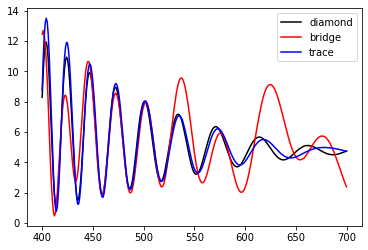

In [9]:
f6 = [2471.18202365,10.16291437,51.80404439,20.00775126,1286.56636705,20.00092073,23.74156603,13.2888618]
f7 = [2205.44983899,17.65829757,45.48952666,29.47436516,1016.8682028,154.80216835,17.8855242,9.00003083]
f8 = [2458.9083063,15.80524707,42.6174337,24.61307889,1268.69882469,149.270171,21.54042486,13.45536315]
tk = th(f8)
plt.plot(wl, 100*diamond_11(tk), 'k-', label = 'diamond')
plt.plot(wl, 100*bridge_11(tk), 'r-', label = 'bridge')
plt.plot(wl, 100*trace_11(tk), 'b-', label = 'trace')
print('bridge:',100*np.mean(bridge_11(tk)))
print('xy-ITO:',100*np.mean(diamond_11(tk)))
print('pattern:',100*np.mean(trace_11(tk)))
#plt.plot(wl2, diamond_12(te), 'k-')
#plt.plot(wl2, bridge_12(te), 'r-')
#plt.plot(wl2, trace_12(te), 'b-')
plt.legend(loc = 'best')
print('bridge:',100*delta_d_b_11(tk))
print('pattern:',100*delta_d_t_11(tk))
#plt.savefig('LENS_rev1_optimized_R_0.png')
plt.show()
pd.DataFrame({'R':100*diamond_11(tk)}).to_csv('R.csv')

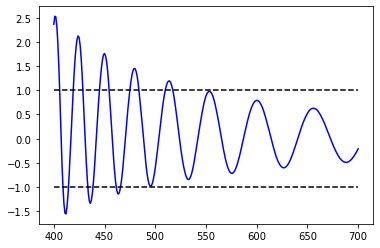

In [53]:
plt.plot(wl, 100*(trace_11(tk)-diamond_11(tk)), '-b')
plt.plot(wl, np.ones(np.size(wl)), '--k')
plt.plot(wl, -np.ones(np.size(wl)), '--k')
#plt.savefig('LENS_rev1_sim_delta_d_t_opt.png')
plt.show()

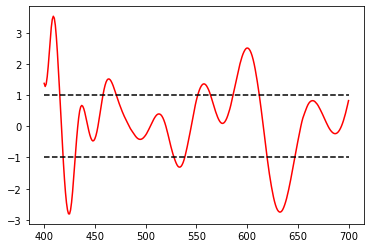

In [54]:
plt.plot(wl, 100*(bridge_11(tk)-diamond_11(tk)), '-r')
plt.plot(wl, np.ones(np.size(wl)), '--k')
plt.plot(wl, -np.ones(np.size(wl)), '--k')
#plt.savefig('LENS_rev1_sim_delta_d_b_opt.png')
plt.show()

pd.DataFrame(
    {
        'wavelength(nm)': wl,
        'ITO_n': ITO.nvalues(wl),
        'ITO_k': ITO.kvalues(wl),
        'OC_n': OC.nvalues(wl),
        'OC_k': OC.kvalues(wl),
        'SiN_n': SiN.nvalues(wl),
        'SiN_k': SiN.kvalues(wl),
        'SiO2_n': SiO2.nvalues(wl),
        'SiO2_k': SiO2.kvalues(wl)
    }

).to_csv('LENS_material.csv')

pd.DataFrame(
    {
        'xy-ITO ': 100*diamond_11(tk),
        'trace spacing': 100*trace_11(tk),
        'bridge': 100*bridge_11(tk)
    }
).to_csv('LENS_optimized_R_0.csv')